In [36]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('./weatherHistory.csv')
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [37]:
df1 = df[["Humidity","Wind Speed (km/h)","Pressure (millibars)","Wind Bearing (degrees)"]]

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Humidity                96453 non-null  float64
 1   Wind Speed (km/h)       96453 non-null  float64
 2   Pressure (millibars)    96453 non-null  float64
 3   Wind Bearing (degrees)  96453 non-null  float64
dtypes: float64(4)
memory usage: 2.9 MB


In [39]:
df1.isnull().sum()*100/df.shape[0]

Humidity                  0.0
Wind Speed (km/h)         0.0
Pressure (millibars)      0.0
Wind Bearing (degrees)    0.0
dtype: float64

In [40]:
Y = df["Temperature (C)"]
X = df1

In [41]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-3.24962454e+01 -2.01413742e-01 -6.91759209e-04  4.04836936e-03]
Sabit değer (bias): 
 37.926438185285235


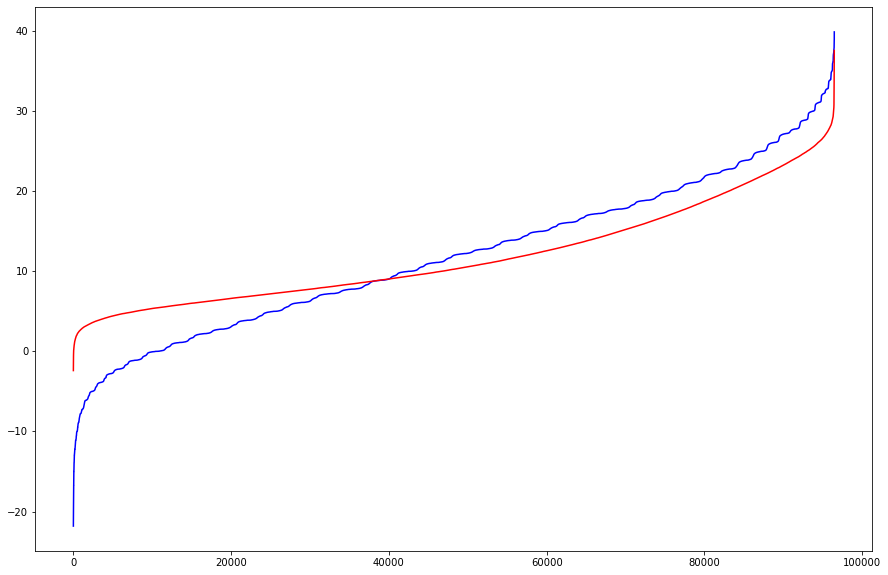

In [43]:
plt.figure(figsize=(15,10))
plt.plot(range(df.shape[0]),np.sort(Y),color="blue")
plt.plot(range(df.shape[0]),np.sort(lrm.predict(X)),color="red")
plt.show()

In [44]:
#Ortalama hata
tahmin = lrm.predict(X)
hatalar = Y - tahmin

print("Sicaklik tahmini ortalama hatası : {:.15f}".format(np.mean(hatalar)))

Sicaklik tahmini ortalama hatası : -0.000000000000001


NameError: name 'eksen_font' is not defined

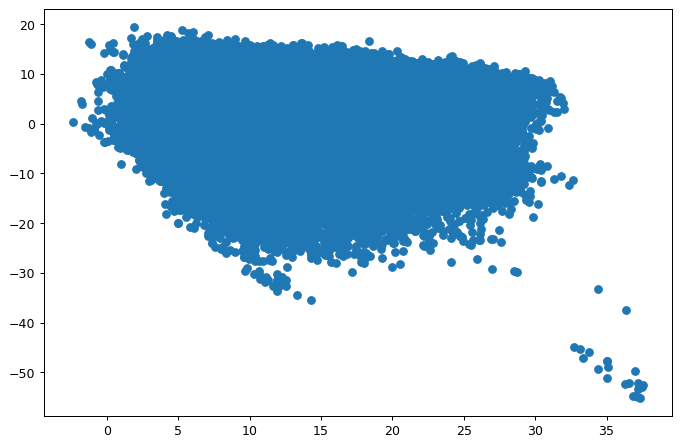

In [45]:
#Homoscedasticity
plt.figure(figsize=(9,6), dpi=90)
plt.scatter(tahmin, hatalar)
plt.xlabel('Tahmin Edilen', fontdict=eksen_font)
plt.ylabel('Artık (Residual)', fontdict=eksen_font)
plt.axhline(y=0)
plt.title('Artık x Tahmin', fontdict=baslik_font)
plt.show()

In [46]:
#Bartlett ve Levene testleri
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 2464.84 ve p değeri : 0.000000000000000000000
Levene test değeri   : 2321.24 ve p değeri : 0.000000000000000000000


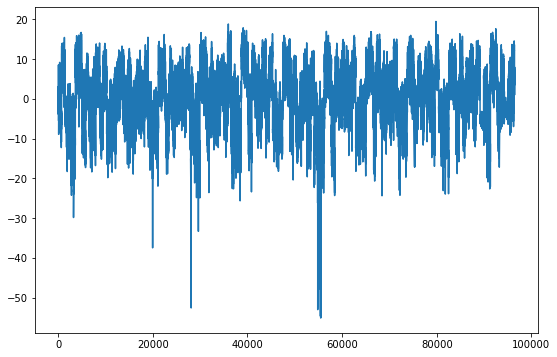

In [47]:
plt.figure(figsize=(9,6))
plt.plot(hatalar)
plt.show()

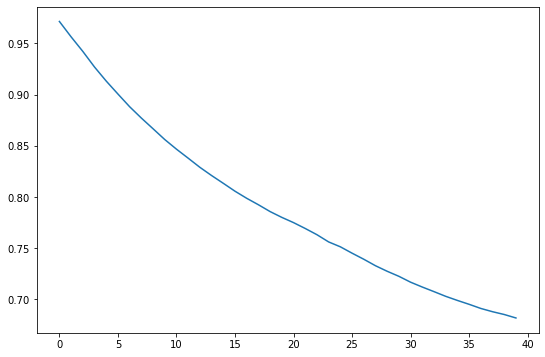

In [48]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

In [49]:
#Hata terimleri birbiriyle iliskisizdir, hata kosullarinin birbiriyle korele olmadigi gorulmektedir.

In [50]:
#2 Ev Fiyatlari

In [51]:
train = pd.read_csv('./train.csv')
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [52]:
processed_nondiscrete = train[["LotArea",
"YearBuilt",
"Fireplaces",
"PoolArea",
"YrSold",
"GarageArea",
"OverallQual",
"OverallCond",
"GarageCars",
"TotRmsAbvGrd"]]

In [53]:
processed_categorical = pd.get_dummies(train[["MSSubClass",
"MSZoning",
"Street",
"LandContour",
"Utilities",
"Neighborhood",
"Condition1",
"Condition2",
"BldgType",
"HouseStyle",
"Exterior1st",
"ExterQual",
"ExterCond",
"Foundation",
"Heating",
"HeatingQC",
"CentralAir",
"Electrical",
"KitchenQual",
"Functional",
"GarageType",
"GarageFinish",
"GarageQual",
"SaleCondition"
]])

In [54]:
df2=processed_categorical
df2.append(processed_nondiscrete)
df2.head()

,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,20,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,60,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,70,0,0,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,60,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [55]:
df2.isnull().sum()*100/df.shape[0]

MSSubClass               0.0
MSZoning_C (all)         0.0
MSZoning_FV              0.0
MSZoning_RH              0.0
MSZoning_RL              0.0
                        ... 
SaleCondition_AdjLand    0.0
SaleCondition_Alloca     0.0
SaleCondition_Family     0.0
SaleCondition_Normal     0.0
SaleCondition_Partial    0.0
Length: 148, dtype: float64

In [56]:
Y = train['SalePrice']
X = df2

In [57]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [   -229.56956671  -23726.27204547   -2734.29077547    6026.32669589
    6885.10311383   13549.1330114     1387.28124065   -1387.28124055
  -14256.91626341   11386.77774556    8896.71653528   -6026.57801753
   41809.21694969  -41809.21694971   19480.44962184   -8138.95135745
   -8312.77071341  -29337.45517768    6206.83439788  -10087.45913489
   15179.06390792  -36187.9394442   -27877.04931181  -49844.55994962
  -36822.86061834  -18254.19118485  -26540.04907823   12958.83113927
   -4543.26251884   99301.6716387    57762.24654304  -44242.19511097
  -22946.42808861  -26793.4311669    -4191.02880089   17657.17297037
   75563.61171743   19083.22808807   30926.52163253   -3008.1802143
   -8456.38247965     994.58785511   23957.72083147   23138.18614367
  -11865.73282365    1421.05293483  -30567.88364786    4386.63140041
   -2849.91922298    8084.17031424    4530.77659281   72565.688213
 -110619.96632748   15941.23615167   11100.42311016    1247.59116857
    2790.4193017    37

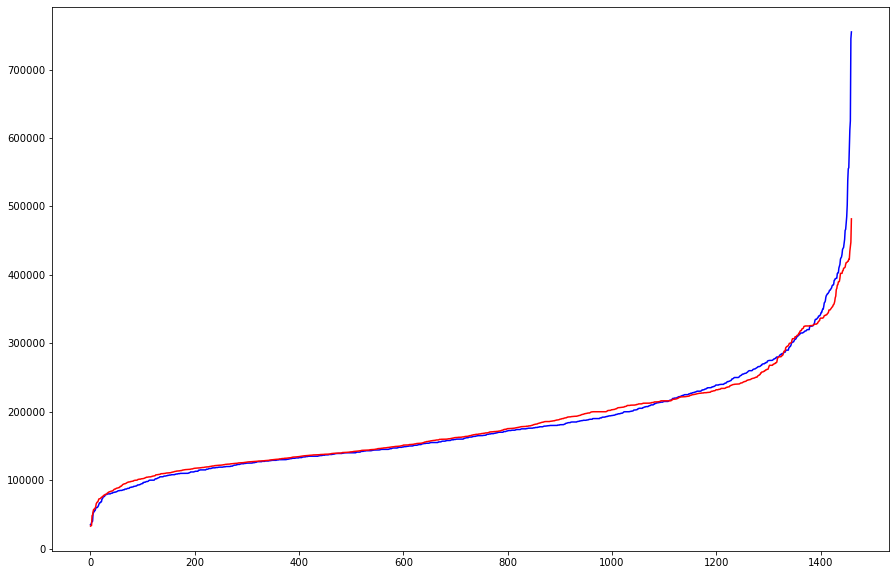

In [60]:
plt.figure(figsize=(15,10))
plt.plot(range(df2.shape[0]),np.sort(Y),color="blue")
plt.plot(range(df2.shape[0]),np.sort(lrm.predict(X)),color="red")
plt.show()

In [61]:
#Ortalama hata
tahmin = lrm.predict(X)
hatalar = Y - tahmin

print("Sicaklik tahmini ortalama hatası : {:.15f}".format(np.mean(hatalar)))

Sicaklik tahmini ortalama hatası : 0.000000000052467


NameError: name 'eksen_font' is not defined

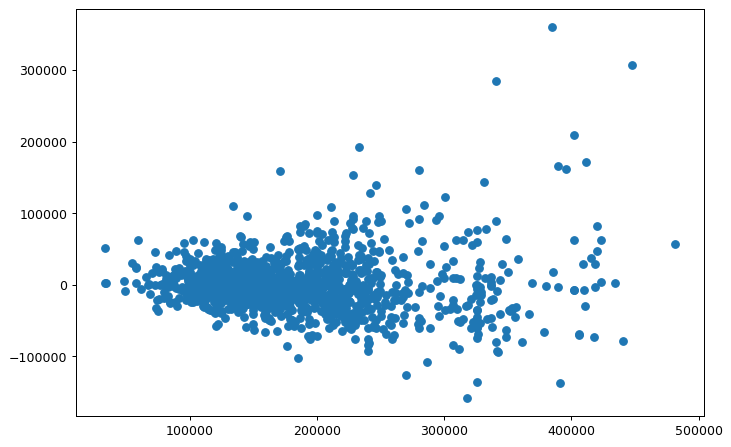

In [62]:
#Homoscedasticity
plt.figure(figsize=(9,6), dpi=90)
plt.scatter(tahmin, hatalar)
plt.xlabel('Tahmin Edilen', fontdict=eksen_font)
plt.ylabel('Artık (Residual)', fontdict=eksen_font)
plt.axhline(y=0)
plt.title('Artık x Tahmin', fontdict=baslik_font)
plt.show()

In [63]:
#Bartlett ve Levene testleri
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 523.56 ve p değeri : 0.000000000000000000000
Levene test değeri   : 354.34 ve p değeri : 0.000000000000000000000


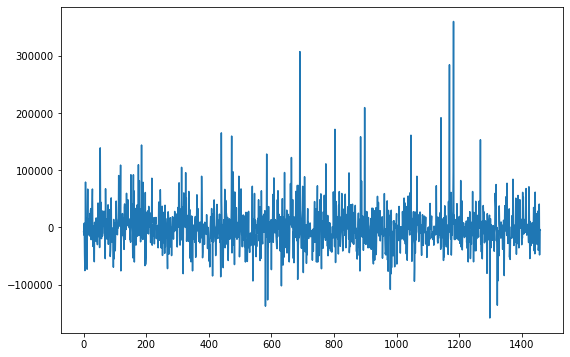

In [64]:
plt.figure(figsize=(9,6))
plt.plot(hatalar)
plt.show()

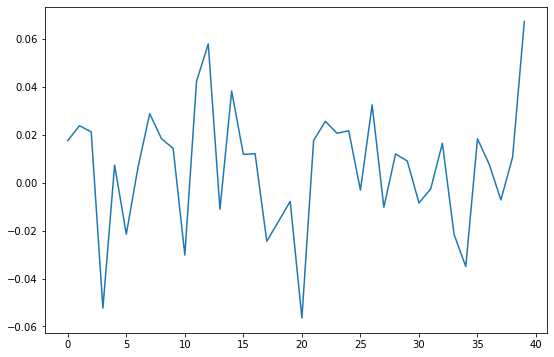

In [65]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

In [66]:
#Hata terimleri birbiriyle iliskisizdir, hata kosullarinin birbiriyle korele olmadigi gorulmektedir.